In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # for visualization

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Specify binary columns as 'category'
binary_columns = ['HasCrCard', 'IsActiveMember']
df[binary_columns] = df[binary_columns].astype('category')

In [142]:

# Continue with the rest of the preprocessing steps
# Handle missing values, encode categorical variables, normalize numerical features, etc.
# Example preprocessing (you may need to adapt this to your specific dataset)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [143]:
# Separate features and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

In [144]:
# Define preprocessing steps for numerical and categorical features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Geography', 'Gender']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])


In [145]:
# Use ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [146]:
# Preprocess the data
X_processed = preprocessor.fit_transform(X)

In [147]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [148]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [149]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [151]:
# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [152]:
# Evaluate Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

logistic_regression_preds = logistic_regression.predict(X_test)
logistic_regression_probs = logistic_regression.predict_proba(X_test)[:, 1]
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_preds))
print("ROC AUC:", roc_auc_score(y_test, logistic_regression_probs))
print(classification_report(y_test, logistic_regression_preds))

Logistic Regression:
Accuracy: 0.811
ROC AUC: 0.7789078000034835
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [153]:
# Evaluate Random Forest
random_forest_preds = random_forest.predict(X_test)
random_forest_probs = random_forest.predict_proba(X_test)[:, 1]
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, random_forest_preds))
print("ROC AUC:", roc_auc_score(y_test, random_forest_probs))
print(classification_report(y_test, random_forest_preds))

Random Forest:
Accuracy: 0.867
ROC AUC: 0.8649649830338327
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [154]:
# Evaluate Gradient Boosting
gradient_boosting_preds = gradient_boosting.predict(X_test)
gradient_boosting_probs = gradient_boosting.predict_proba(X_test)[:, 1]
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, gradient_boosting_preds))
print("ROC AUC:", roc_auc_score(y_test, gradient_boosting_probs))
print(classification_report(y_test, gradient_boosting_preds))

Gradient Boosting:
Accuracy: 0.8675
ROC AUC: 0.8728930838522939
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [155]:

# Feature Importance Analysis (for Random Forest and Gradient Boosting)
# Analyze feature importance and provide insights
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' - Feature Importance')
    plt.show()


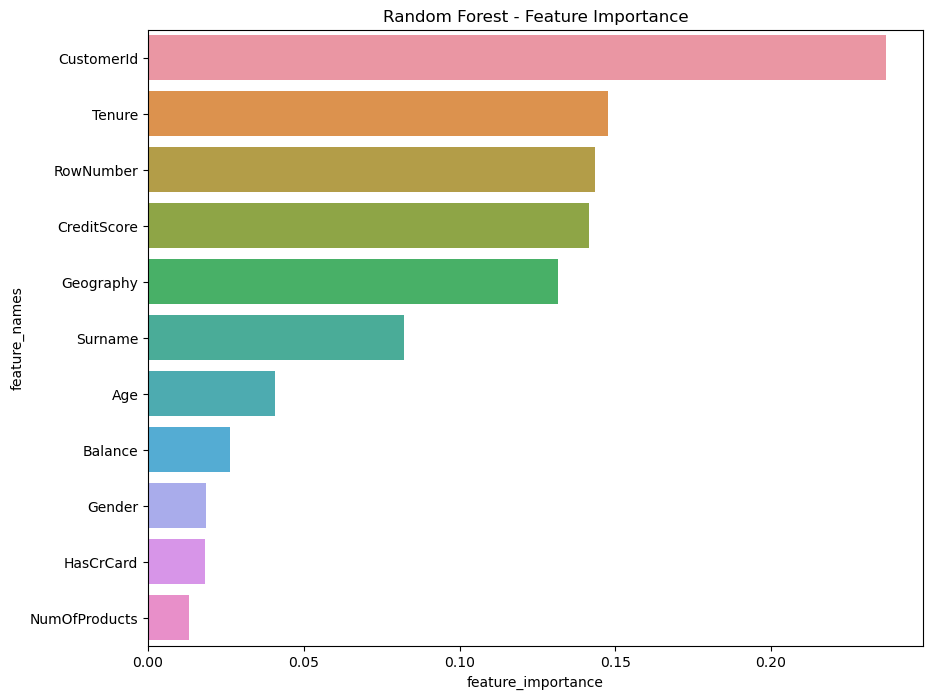

In [156]:
# Feature importance analysis for Random Forest
def plot_feature_importance(importance, names, model_type):
    # Sort the feature importances and names by importance in descending order
    sorted_indices = np.argsort(importance)[::-1]
    feature_importance = importance[sorted_indices]
    feature_names = np.array(names)[sorted_indices]

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' - Feature Importance')
    plt.show()

# Usage
plot_feature_importance(random_forest.feature_importances_, X.columns, 'Random Forest')


In [157]:
print("Number of features in X.columns:", len(X.columns))
print("Length of importance array:", len(random_forest.feature_importances_))
print("Features in X.columns:", X.columns)

Number of features in X.columns: 13
Length of importance array: 11
Features in X.columns: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


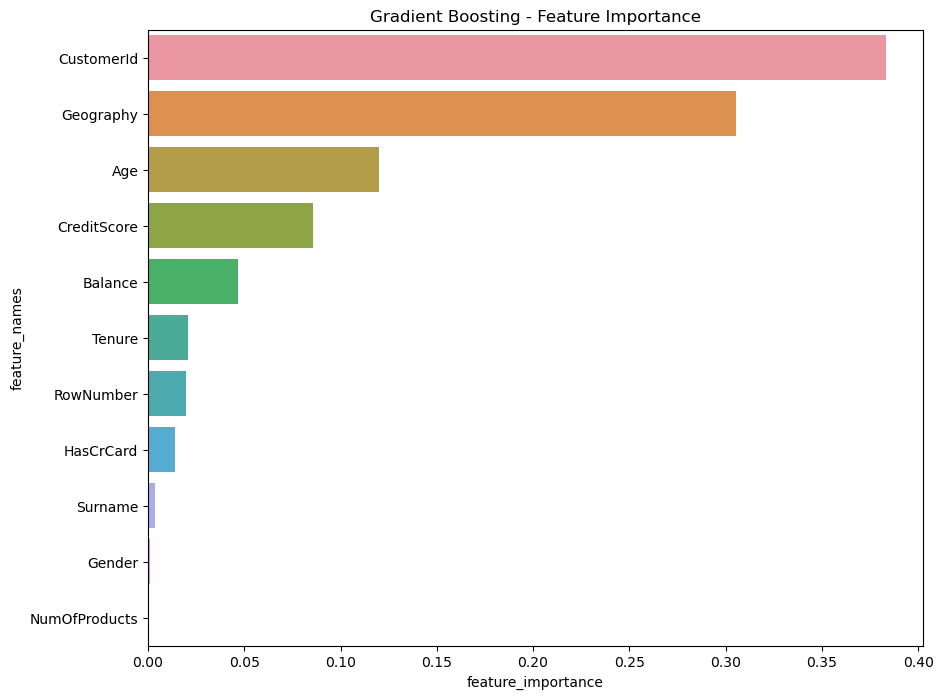

In [158]:
# Feature importance analysis for Gradient Boosting
plot_feature_importance(gradient_boosting.feature_importances_, X.columns, 'Gradient Boosting')

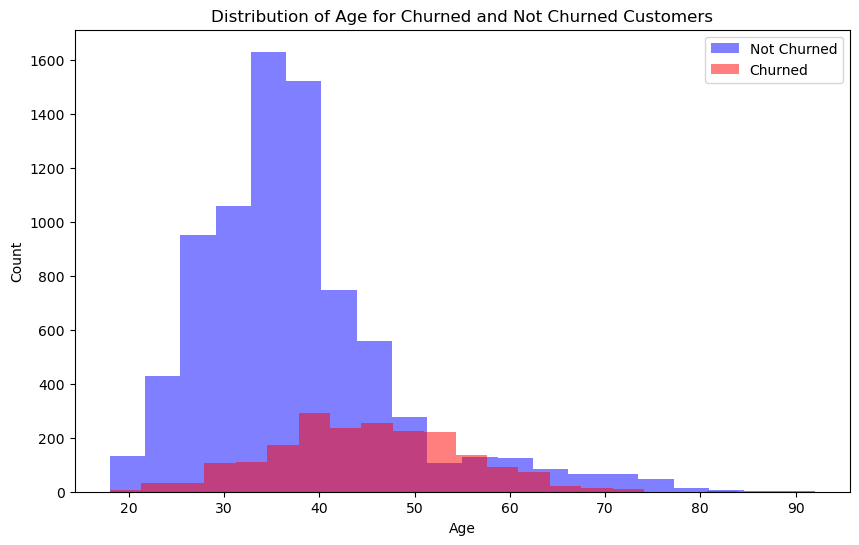

In [159]:
# Additional visualization code example:
# Plot histograms of the 'Age' feature for churned and non-churned customers
plt.figure(figsize=(10, 6))
plt.hist(X[y == 0]['Age'], bins=20, alpha=0.5, label='Not Churned', color='blue')
plt.hist(X[y == 1]['Age'], bins=20, alpha=0.5, label='Churned', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Age for Churned and Not Churned Customers')
plt.show()